In [108]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [138]:
def compute_mse(y, tx, w):
   
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)

    e = y - tx.dot(w)

    L = 1/(2*y.shape[0]) * np.square(e).sum()
    #print(L)
    
    return L

def compute_rmse(y, tx, w):
    return np.sqrt(2*compute_mse(y, tx, w))


def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    y = y.reshape(-1, 1)
    
    txt = np.transpose(tx)
    XTX = txt.dot(tx)
    
    w = np.linalg.inv(XTX).dot(txt).dot(y)
    
    e = y - tx.dot(w)
    L = 1/(2*y.shape[0]) * np.square(e).sum()
    
    return w,L
    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [110]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    gradDescentLoss = 15.385887868829402 
    gradDescentW = [73.293922, 13.47971243]
    gradDescentExecTime =0.017
    
    start_time = datetime.datetime.now()
    w, L = least_squares(y, tx)
    end_time = datetime.datetime.now()

    exection_time = (end_time - start_time).total_seconds()
    
    # Print result    
    print ("gradient descend w : {}".format(gradDescentW))
    print ("least squares w : {}".format(w))
    print ("delta_w : {}\n".format(w-gradDescentW))
    
    print ("gradient descend Loss : {}".format(gradDescentLoss))
    print ("least square Loss : {}".format(L))
    print ("delta_loss : {}\n".format(L-gradDescentLoss))
    
    print ("gradient descend exec time : {}".format(gradDescentExecTime))
    print ("least square exec time : {}".format(exection_time))
    print ("delta exec time : {}\n".format(exection_time-gradDescentExecTime))
    
    return 0
    

test_your_least_squares()

gradient descend w : [73.293922, 13.47971243]
least squares w : [[ 73.293922  ]
 [ 13.47971243]]
delta_w : [[  2.10521023e-09   5.98142096e+01]
 [ -5.98142096e+01   4.98905806e-09]]

gradient descend Loss : 15.385887868829402
least square Loss : 15.385887868829402
delta_loss : 0.0

gradient descend exec time : 0.017
least square exec time : 0.000428
delta exec time : -0.016572



0

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [111]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [112]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    x = x.reshape(-1)    
    phi = np.zeros((x.shape[0], degree+1))
            
    for n in range(degree+1):
        phi[:, n] = phi[:, n]+np.power(x, n)
       
    return phi

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.2496587036090912
Processing 4th experiment, degree=12, rmse=0.25427451176305493


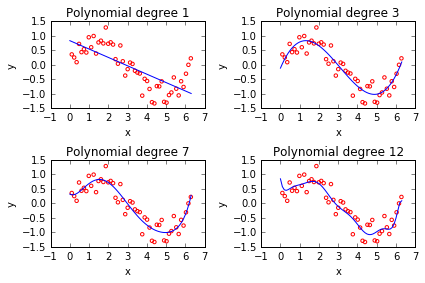

In [139]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        phi = build_poly(x, degree)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        weight, L = least_squares(y, phi)
        rmse = np.sqrt(2*L)
        
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

The fit gets not nesserarily better as we increase the degree. Because of the overfit ! The best view is the polynomial degree 7 in this case. 




# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [140]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    shuffle_indices = np.random.permutation(np.arange(len(x)))
    shuffled_y = y[shuffle_indices]
    shuffled_x = x[shuffle_indices]
    
    max_i = len(x)-1
    cut_i = np.floor(max_i * ratio)
    
    return shuffled_x[0:cut_i], shuffled_y[0:cut_i],shuffled_x[cut_i:max_i],shuffled_y[cut_i:max_i] 
    
    

Then, test your `split_data` function below.

In [141]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed=seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
        
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    w, L_train = least_squares(y_train, phi_train)
    
   
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*L_train)
    rmse_te = compute_rmse(y_test, phi_test, w)
    
    
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

    
    
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.497, Testing RMSE=0.198
proportion=0.9, degree=3, Training RMSE=0.257, Testing RMSE=0.301
proportion=0.9, degree=7, Training RMSE=0.244, Testing RMSE=0.335
proportion=0.9, degree=12, Training RMSE=9.655, Testing RMSE=2.111
proportion=0.5, degree=1, Training RMSE=0.464, Testing RMSE=0.526
proportion=0.5, degree=3, Training RMSE=0.235, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.231, Testing RMSE=0.295
proportion=0.5, degree=12, Training RMSE=0.249, Testing RMSE=1.590
proportion=0.1, degree=1, Training RMSE=0.476, Testing RMSE=0.545
proportion=0.1, degree=3, Training RMSE=0.000, Testing RMSE=1.411
proportion=0.1, degree=7, Training RMSE=8.923, Testing RMSE=8.122
proportion=0.1, degree=12, Training RMSE=6.825, Testing RMSE=30.555


/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Ridge Regression
Please fill in the function below.

In [169]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    y = y.reshape(-1, 1)

    txt = np.transpose(tx)
    
    XTXL = txt.dot(tx)+ lamb*np.identity(tx.shape[1])    
  
    w = np.linalg.inv(XTXL).dot(txt).dot(y)
    
    return w

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[0.23129932619129631, 0.23138563143518254, 0.23148899292308944, 0.23164509473437278, 0.2320107923344969, 0.2326636543924851, 0.23393437970084952, 0.23862040398854778, 0.2562341212666181, 0.29715886965537514]


[0.29532541734832379, 0.295521717604384, 0.29558677978472225, 0.29536054630173997, 0.29470625899300151, 0.29247351616861589, 0.28625274508343024, 0.27697072337898615, 0.28026166047393702, 0.31963995696968167]


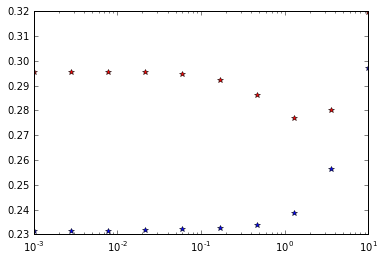

In [183]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed=seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    rmse_trs = []
    rmse_tes = []
    
    for lamb in lambdas:
        
        w = ridge_regression(y_train, phi_train, lamb)
        rmse_trs.append(compute_rmse(y_train, phi_train, w))
        rmse_tes.append(compute_rmse(y_test, phi_test, w))
        
    
    
    print(rmse_trs)
    print("\n")
    print(rmse_tes)
    
    plt.plot(lambdas, rmse_trs, 'b*', lambdas, rmse_tes, 'r*')
    #plt.axis([-1000, 10, 0.2, 0.45])
    plt.xscale('log', nonposy='clip')
    plt.show()
    
    
    
seed = 6
degree = 7
split_ratio = 0.5

ridge_regression_demo(x, y, degree, split_ratio, seed)